# Análise Exploratória

In [ ]:
# @title 1. Bibliotecas

# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# @title 2. Carregamento do dataset

# Install dependencies as needed:
!pip install kagglehub[pandas-datasets]
!pip install --upgrade kagglehub
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Sleep_health_and_lifestyle_dataset.csv"

# Load the latest version
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "uom190346a/sleep-health-and-lifestyle-dataset",
  file_path,
)

print("First 5 records:", df.head())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 10.9 MB/s eta 0:00:00
  Attempting uninstall: kagglehub
    Found existing installation: kagglehub 0.3.13
    Uninstalling kagglehub-0.3.13:
      Successfully uninstalled kagglehub-0.3.13


100%|██████████| 23.6k/23.6k [00:00<00:00, 19.5MB/s]

First 5 records:    Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80 

## **Análise**

In [ ]:
# @title Inspeção Inicial

# Quantidade de linhas e colunas
print("Dimensionalidade do dataset:", df.shape)
print()

# Tipos de dados
print("Tipos de dados:")
df.info()
print()

# Valores ausentes
# Substituir os nulos por "None" na coluna "Sleep Disorder"
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

print("Contagem de valores ausentes na tabela")
print(df.isnull().sum())
print()

# Colunas inesperadas ou redundantes
print("Estrutura geral das colunas:")
df.head()

Dimensionalidade do dataset: (374, 13)

Tipos de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7),

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


**Estatísticas Descritivas Globais**

In [ ]:
# @title Decomposição da Pressão Arterial

df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True)

# 2. Converte as novas colunas para o tipo numérico (inteiro)
df['Systolic_BP'] = df['Systolic_BP'].astype(int)
df['Diastolic_BP'] = df['Diastolic_BP'].astype(int)

print(df[['Blood Pressure', 'Systolic_BP', 'Diastolic_BP']].head())

  Blood Pressure  Systolic_BP  Diastolic_BP
0         126/83          126            83
1         125/80          125            80
2         125/80          125            80
3         140/90          140            90
4         140/90          140            90


In [ ]:
# @title Estatísticas numéricas
# Principal descrição das variáveis numéricas
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic_BP,Diastolic_BP
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,128.553476,84.649733
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,7.748118,6.161611
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000


In [ ]:
# @title Estatísticas Categóricas

# Principal descrição da variável categórica 'Occupation'

print("Quantidade de profissões:", df['Occupation'].nunique())
print()

print("Quantidade de indivíduos por profissão:", df['Occupation'].value_counts())
print()

print("Proporção de cada profissão:", df['Occupation'].value_counts(normalize=True))
print()

# Principal descrição da variável categórica 'BMI Category'

print("Quantidade de categorias em BMI Category:", df['BMI Category'].nunique())
print()

print("Quantidade de indivíduos por categoria:", df['BMI Category'].value_counts())
print()

print("Proporção de cada categoria:", df['BMI Category'].value_counts(normalize=True))
print()

# Principal descrição da variável categórica 'Sleep Disorder'

print("Quantidade de categorias:", df['Sleep Disorder'].nunique())
print()

print("Quantidade de indivíduos por categoria:", df['Sleep Disorder'].value_counts())
print()

print("Proporção de cada categoria:", df['Sleep Disorder'].value_counts(normalize=True))

Quantidade de profissões: 11

Quantidade de indivíduos por profissão: Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

Proporção de cada profissão: Occupation
Nurse                   0.195187
Doctor                  0.189840
Engineer                0.168449
Lawyer                  0.125668
Teacher                 0.106952
Accountant              0.098930
Salesperson             0.085561
Scientist               0.010695
Software Engineer       0.010695
Sales Representative    0.005348
Manager                 0.002674
Name: proportion, dtype: float64

Quantidade de categorias em BMI Category: 4

Quantidade de indivíduos por categoria: BMI Category
Normal           195
Overweight       148
Normal Weight     

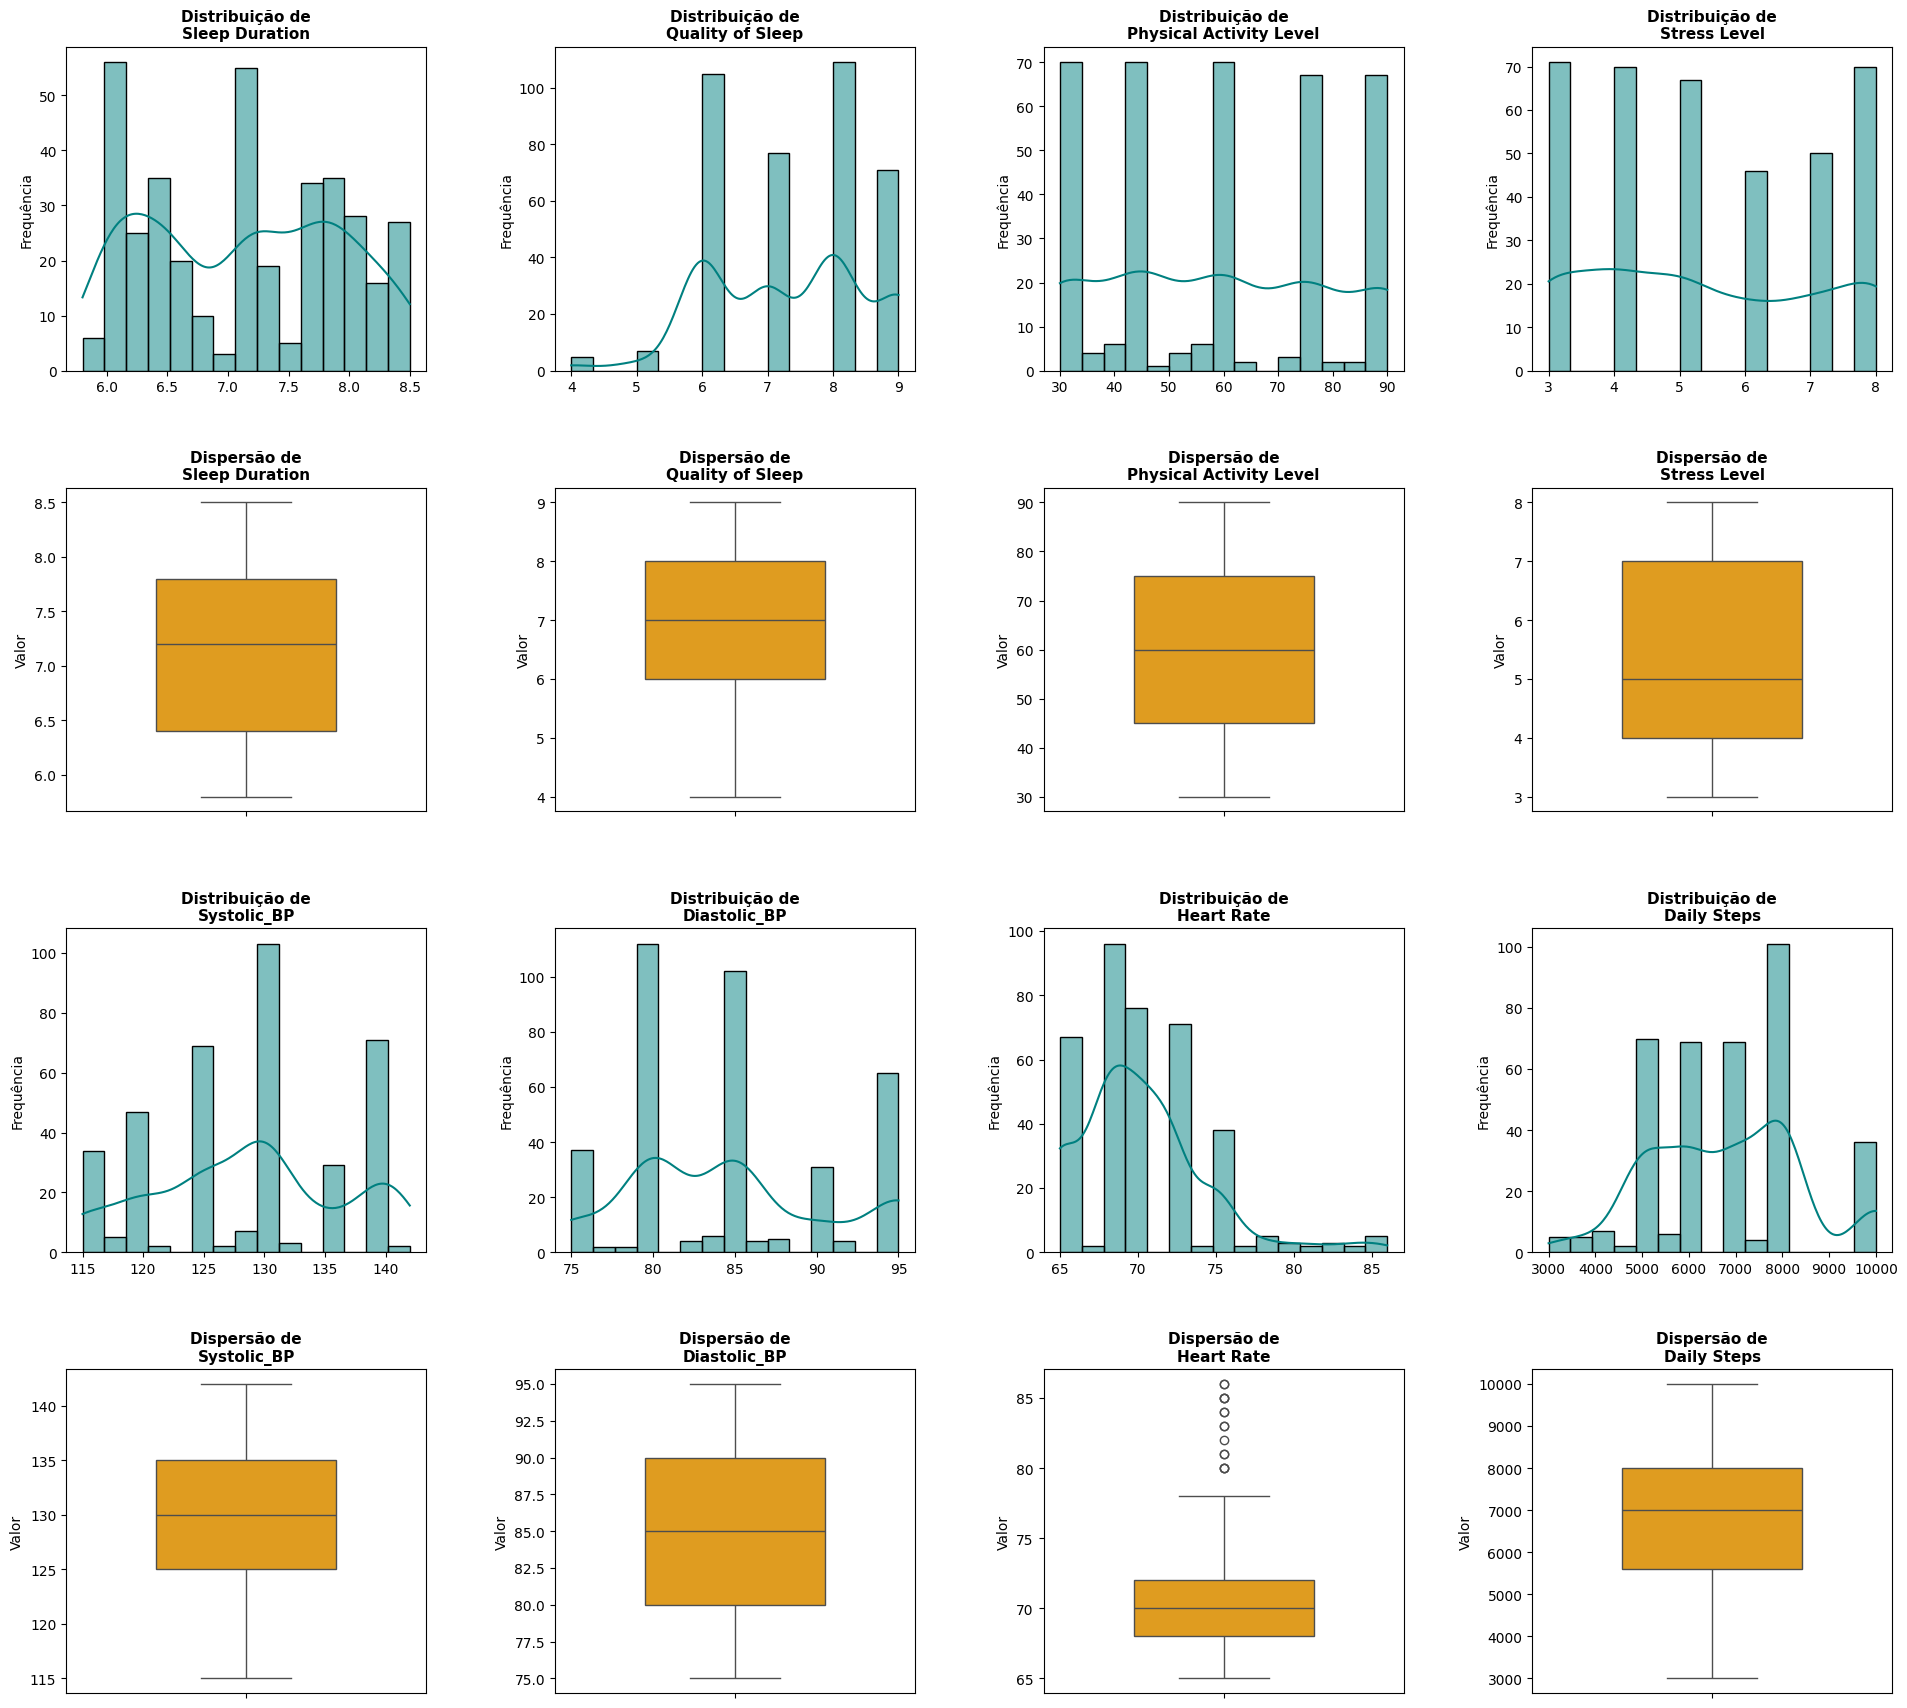

In [ ]:
# @title Análise Univariada

variaveis = ['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
             'Systolic_BP', 'Diastolic_BP', 'Heart Rate', 'Daily Steps']

plt.figure(figsize=(20, 18))

for i, var in enumerate(variaveis):
    offset = 0 if i < 4 else 4

    plt.subplot(4, 4, i + 1 + offset)
    sns.histplot(df[var], kde=True, color="teal", bins=15)
    plt.title(f'Distribuição de\n{var}', fontsize=11, fontweight='bold')
    plt.ylabel('Frequência')
    plt.xlabel('')

    plt.subplot(4, 4, i + 5 + offset)
    sns.boxplot(y=df[var], color='orange', width=0.5)
    plt.title(f'Dispersão de\n{var}', fontsize=11, fontweight='bold')
    plt.ylabel('Valor')

plt.tight_layout(pad=4.0)
plt.show()

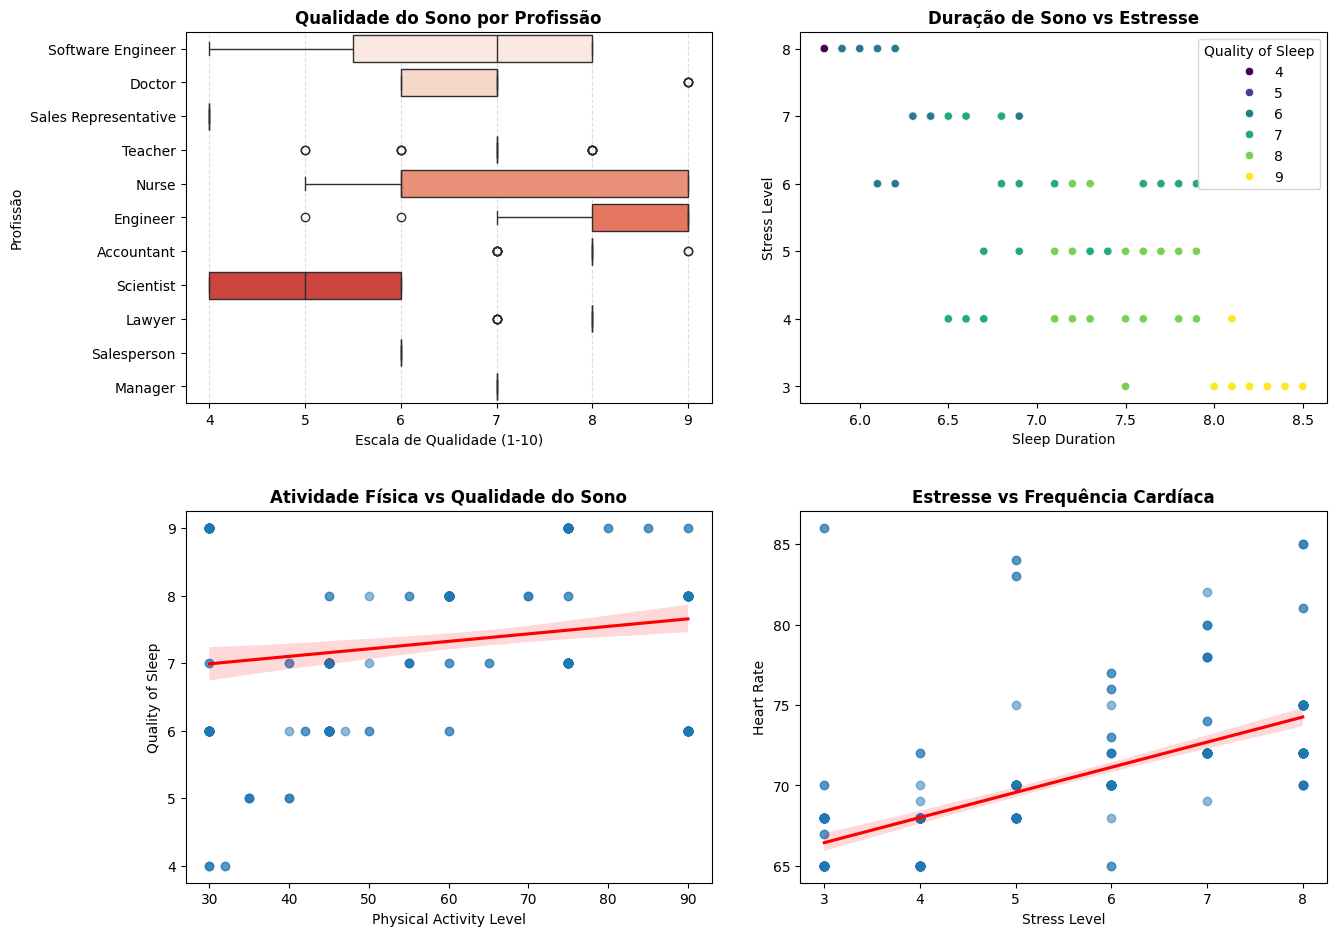

In [ ]:
# @title Análise Bivariada

plt.figure(figsize=(14, 10))

# 1. Occupation x Quality of Sleep
plt.subplot(2, 2, 1)
sns.boxplot(
    data=df,
    x='Quality of Sleep',
    y='Occupation',
    hue='Occupation',
    palette='Reds',
    legend=False
)
plt.title('Qualidade do Sono por Profissão', fontweight='bold')
plt.xlabel('Escala de Qualidade (1-10)')
plt.ylabel('Profissão')
plt.grid(axis='x', linestyle='--', alpha=0.4)

# 2. Sleep Duration x Stress Level
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='Sleep Duration', y='Stress Level', hue='Quality of Sleep', palette='viridis')
plt.title('Duração de Sono vs Estresse', fontweight='bold')

# 3. Physical Activity x Quality of Sleep
plt.subplot(2, 2, 3)
sns.regplot(data=df, x='Physical Activity Level', y='Quality of Sleep', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Atividade Física vs Qualidade do Sono', fontweight='bold')

# 4. Stress Level x Heart Rate
plt.subplot(2, 2, 4)
sns.regplot(data=df, x='Stress Level', y='Heart Rate', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Estresse vs Frequência Cardíaca', fontweight='bold')

plt.tight_layout(pad=3.0)
plt.show()

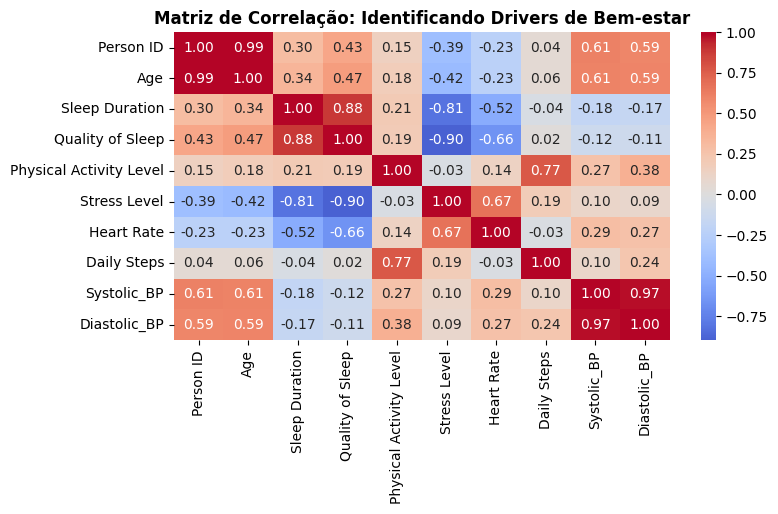

In [ ]:
# @title Correlação entre variáveis

# 1. Seleciona apenas as colunas numéricas para o cálculo
corr = df.select_dtypes(include=np.number).corr()

# 2. Configura a visualização
plt.figure(figsize=(8, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", center=0)

plt.title('Matriz de Correlação: Identificando Drivers de Bem-estar', fontweight='bold')
plt.show()

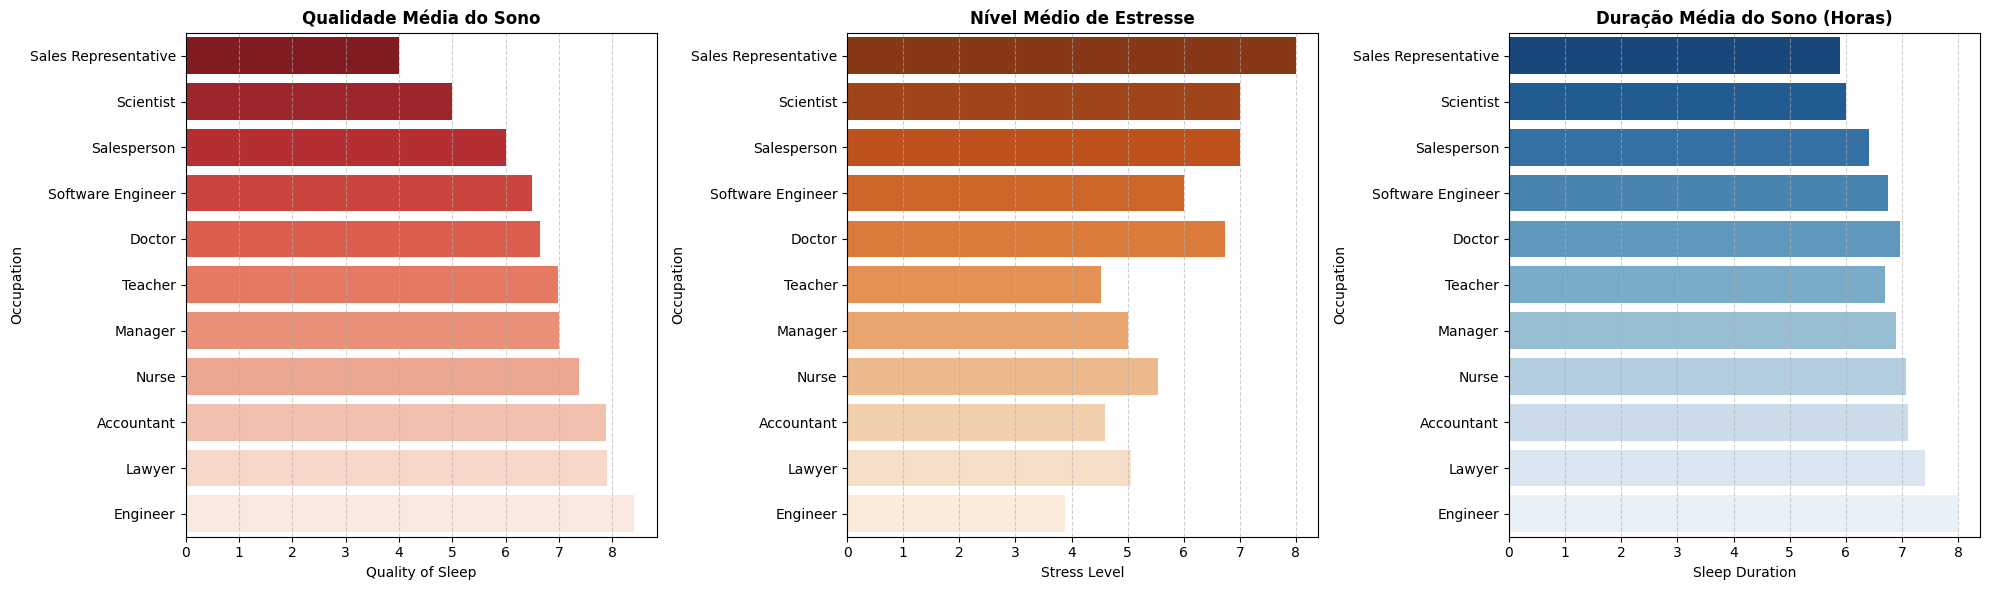

In [ ]:
# @title Análise por Profissão

analise_ocupacional = df.groupby('Occupation').agg({
    'Quality of Sleep': 'mean',
    'Stress Level': 'mean',
    'Sleep Duration': 'mean'
}).reset_index().sort_values(by='Quality of Sleep')

plt.figure(figsize=(20, 6))

# Gráfico 1: Ranking de Qualidade do Sono
plt.subplot(1, 3, 1)
sns.barplot(
    data=analise_ocupacional,
    x='Quality of Sleep',
    y='Occupation',
    hue='Occupation',
    palette='Reds_r',
    legend=False
)
plt.title('Qualidade Média do Sono', fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Gráfico 2: Ranking de Nível de Estresse
plt.subplot(1, 3, 2)
sns.barplot(
    data=analise_ocupacional,
    x='Stress Level',
    y='Occupation',
    hue='Occupation',
    palette='Oranges_r',
    legend=False
)
plt.title('Nível Médio de Estresse', fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Gráfico 3: Ranking de Duração do Sono (Tempo de Sono)
plt.subplot(1, 3, 3)
sns.barplot(
    data=analise_ocupacional,
    x='Sleep Duration',
    y='Occupation',
    hue='Occupation',
    palette='Blues_r',
    legend=False
)
plt.title('Duração Média do Sono (Horas)', fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

**Interpretações e Insights da EDA:**

1. Grupos de Maior Risco Ocupacional: As profissões de Sales Representative, Scientist e Nurse apresentam os indicadores mais críticos. Enquanto representantes de vendas e cientistas possuem as menores médias de duração de sono, os enfermeiros exibem alta variabilidade com picos de estresse elevado.


2. Drivers da Qualidade do Sono: A variável com maior impacto (correlação mais forte) na Qualidade do Sono é o Nível de Estresse, com um coeficiente negativo de -0.90. Em seguida, a Duração do Sono aparece como o driver positivo mais relevante (0.88). Isso confirma que intervenções no tempo de descanso e na gestão de estresse são os caminhos mais eficazes para o simulador.


3. Padrões Bimodais: Foram identificados padrões bimodais claros nos histogramas de Quality of Sleep (com picos em 6 e 8) e Stress Level (picos em 4 e 8). Isso sugere a existência de dois subgrupos distintos no dataset: indivíduos com rotinas saudáveis e estáveis versus profissionais em condições de alta exaustão e privação de sono.

4. Escala relativa entre variáveis: necessidade de Scaling (diferença entre escalas)

5. Outliners: Heart Rate: max 86bpm, 75% 72bpm -> Robust Scaler (fase 3)


6. Variabilidade: em Physical Activity Level, o std é 20.8, o que configura hábitos muito diferentes entre pessoas.

**Riscos de Modelagem**
1. Risco de Overfitting: O uso de modelos preditivos separados para profissões com baixíssima amostragem é instável. O modelo pode decorar as características desse único indivíduo (Manager, por exemplo) em vez de aprender um padrão geral da profissão.

-> Na fase 3 é recomendável criar uma categoria para as profissões com baixa amostragem

2. O mapeamento de cardinalidade orienta o Encoding: Vimos que Occupation tem muitas categorias, o que exige técnicas como One-Hot Encoding na Fase 3 para que o computador entenda os textos.